In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from collections import Counter
from imblearn.over_sampling import ADASYN

In [2]:
iris = pd.read_csv("iris.csv")
titanic = pd.read_csv("titanic.csv")
titanic = titanic[titanic["Age"].notna()]

## Titanic

Accuracy:
0.8100558659217877
Clf Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       103
           1       0.81      0.72      0.76        76

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


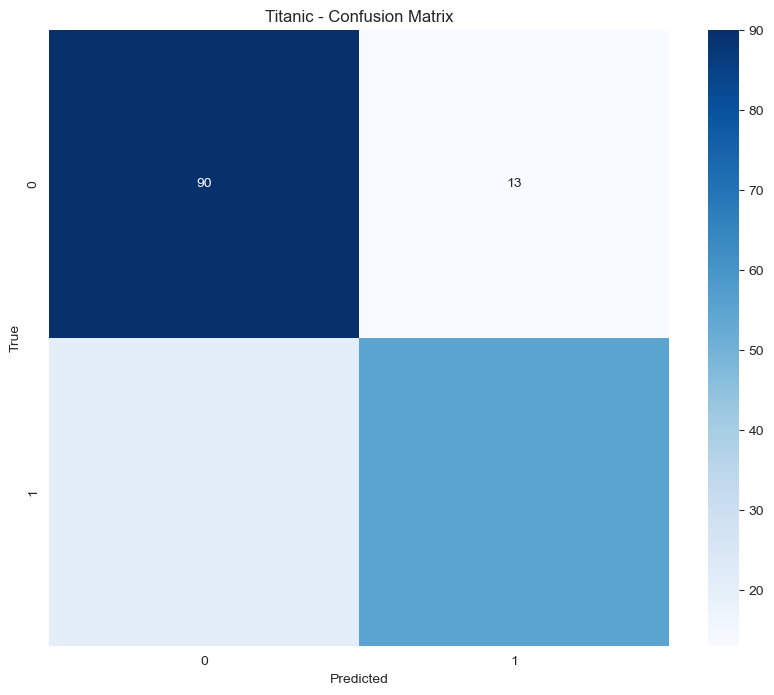

In [7]:
# Titanic
svm_titanic = SVC(kernel="linear")


x_t = titanic.drop(["PassengerId", "Name", "Survived", "Ticket", "Cabin", "Fare"], axis=1)
label_encoder = LabelEncoder()
x_t["Sex"] = label_encoder.fit_transform(x_t["Sex"])
x_t["Embarked"] = label_encoder.fit_transform(x_t["Embarked"])

y_t = titanic["Survived"]

adasyn_ = ADASYN(random_state=13)

x ,y = adasyn_.fit_resample(x_t, y_t)

X_train, X_test, y_train, y_test = train_test_split(x_t, y_t, shuffle=True, random_state=13)

svm_titanic.fit(X_train, y_train)

y_pre = svm_titanic.predict(X_test)

print("Accuracy:")
print(accuracy_score(y_test, y_pre))

print("Clf Report:")
print(classification_report(y_test, y_pre))

conf_matrix = confusion_matrix(y_test, y_pre)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=[0, 1],
            yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Titanic - Confusion Matrix")
plt.show()

## Iris

Accuracy:
0.9473684210526315
Clf Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.88      0.93        16
   virginica       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38


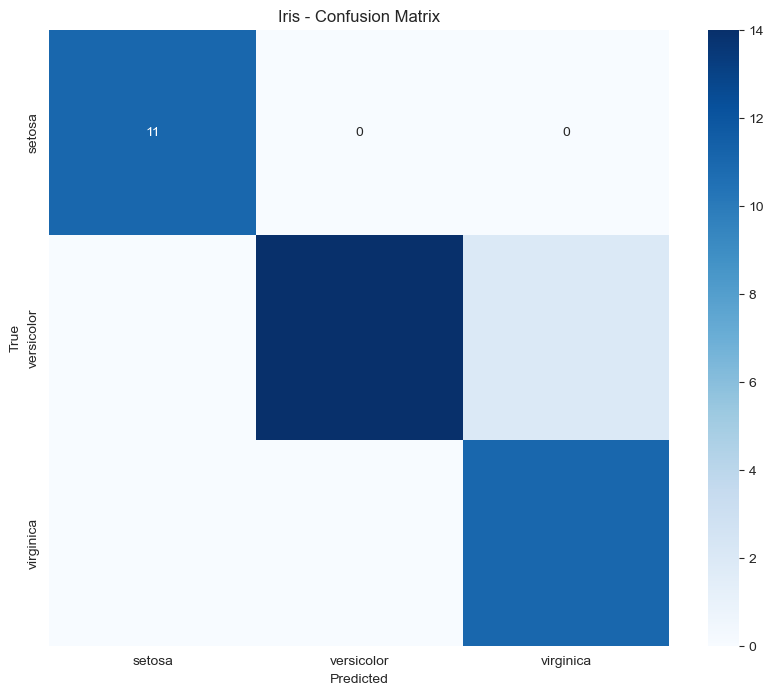

In [3]:
# Iris
svm_iris = SVC(kernel="rbf")

x_i = iris.iloc[:, :-1]
y_i = iris["species"]

labels = [i[0] for i in Counter(y_i).most_common()]

x_train, x_test, Y_train, Y_test = train_test_split(x_i, y_i, shuffle=True, random_state=25)

svm_iris.fit(x_train, Y_train)

y_pre = svm_iris.predict(x_test)

print("Accuracy:")
print(accuracy_score(Y_test, y_pre))

print("Clf Report:")
print(classification_report(Y_test, y_pre))

conf_matrix = confusion_matrix(Y_test, y_pre)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Iris - Confusion Matrix")
plt.show()